In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
def load_data(file_path: str) -> pd.DataFrame:
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return pd.DataFrame()  

In [2]:
load_data("yield-curve-rates-1990-2024.csv")

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,12/31/24,4.40,4.39,4.37,4.32,4.24,4.16,4.25,4.27,4.38,4.48,4.58,4.86,4.78
1,12/30/24,4.43,4.42,4.37,4.33,4.25,4.17,4.24,4.29,4.37,4.46,4.55,4.84,4.77
2,12/27/24,4.44,4.43,4.31,4.35,4.29,4.20,4.31,4.36,4.45,4.53,4.62,4.89,4.82
3,12/26/24,4.45,4.45,4.35,4.37,4.31,4.23,4.30,4.35,4.42,4.49,4.58,4.83,4.76
4,12/24/24,4.44,4.44,4.40,4.38,4.30,4.24,4.29,4.36,4.43,4.52,4.59,4.84,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8752,1/8/90,NaN,NaN,7.79,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
8753,1/5/90,NaN,NaN,7.79,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
8754,1/4/90,NaN,NaN,7.84,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
8755,1/3/90,NaN,NaN,7.89,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04


In [3]:
df=load_data("yield-curve-rates-1990-2024.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df.set_index('Date')
df

/var/folders/y3/nzngm7d50bs8pgqzzcqgkwzh0000gn/T/ipykernel_26263/538678377.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,NaN,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,4.44,4.44,4.40,4.38,4.30,4.24,4.29,4.36,4.43,4.52,4.59,4.84,4.76
2024-12-26,4.45,4.45,4.35,4.37,4.31,4.23,4.30,4.35,4.42,4.49,4.58,4.83,4.76
2024-12-27,4.44,4.43,4.31,4.35,4.29,4.20,4.31,4.36,4.45,4.53,4.62,4.89,4.82


In [6]:
import numpy as np
np.random.normal(0, 0.1, 3)

array([ 0.12808341,  0.08409618, -0.21994877])

In [5]:
# For each year-month, get the last available row
eom_data = df.groupby([df.index.year, df.index.month]).tail(1).reset_index()
eom_data = eom_data.sort_values('Date', ascending=False)
eom_data


,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
419,2024-12-31,4.40,4.39,4.37,4.32,4.24,4.16,4.25,4.27,4.38,4.48,4.58,4.86,4.78
418,2024-11-29,4.76,4.69,4.58,4.52,4.42,4.30,4.13,4.10,4.05,4.10,4.18,4.45,4.36
417,2024-10-31,4.76,4.76,4.64,4.56,4.43,4.27,4.16,4.12,4.15,4.21,4.28,4.58,4.47
416,2024-09-30,4.93,4.87,4.73,4.65,4.38,3.98,3.66,3.58,3.58,3.67,3.81,4.19,4.14
415,2024-08-30,5.41,5.32,5.21,5.12,4.89,4.38,3.91,3.79,3.71,3.80,3.91,4.28,4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1990-05-31,NaN,NaN,8.01,NaN,8.12,8.22,8.50,8.53,8.56,8.64,8.60,NaN,8.58
3,1990-04-30,NaN,NaN,8.07,NaN,8.44,8.58,8.96,9.05,9.04,9.06,9.04,NaN,9.00
2,1990-03-30,NaN,NaN,8.07,NaN,8.24,8.35,8.64,8.69,8.65,8.70,8.65,NaN,8.63
1,1990-02-28,NaN,NaN,8.04,NaN,8.14,8.12,8.43,8.45,8.44,8.54,8.51,NaN,8.54


In [6]:
eom_data_test = eom_data[eom_data['Date'].dt.year > 2020]
eom_data = eom_data[eom_data['Date'].dt.year <= 2020]

In [12]:
eom_data.values[15]

array([Timestamp('2019-09-30 00:00:00'), 1.91, 1.87, 1.88, nan, 1.83,
       1.75, 1.63, 1.56, 1.55, 1.62, 1.68, 1.94, 2.12], dtype=object)

In [13]:
eom_data_test.to_csv("eom_data_test.csv", index=False)

In [226]:
def nelson_siegel(tau, beta0, beta1, beta2, lambd):
    term1 = beta0
    term2 = beta1 * ((1 - np.exp(-lambd * tau)) / (lambd * tau))
    term3 = beta2 * (((1 - np.exp(-lambd * tau)) / (lambd * tau)) - np.exp(-lambd * tau))
    return term1 + term2 + term3


In [227]:
from scipy.optimize import curve_fit
from tqdm import tqdm

beta0_list = []
beta1_list = []
beta2_list = []
dates_list = []

tau = np.array([1/12, 2/12, 3/12, 4/12, 0.5, 1, 2, 3, 5, 7, 10, 20, 30])

# Fix lambda to a constant value (e.g., 0.0609 as suggested by Diebold and Li)
lambd = 0.0609

# Get the yield columns (excluding Date)
yield_columns = ['1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']

# Iterate over each date to fit the NS model
for idx, row in tqdm(eom_data.iterrows(), total=len(eom_data)):
    yields = row[yield_columns].astype(float).values

    # Skip if there are too many NaN values
    if np.sum(np.isnan(yields)) > 3:
        continue

    # Remove NaN values and corresponding tau values
    valid_mask = ~np.isnan(yields)
    valid_tau = tau[valid_mask]
    valid_yields = yields[valid_mask]
 
    try:

        popt, _ = curve_fit(lambda t, b0, b1, b2: nelson_siegel(t, b0, b1, b2, lambd),
                            valid_tau, valid_yields,
                            p0=[0.03, -0.02, 0.02],
                            maxfev=10000)
        beta0_list.append(popt[0])
        beta1_list.append(popt[1])
        beta2_list.append(popt[2])
        dates_list.append(row['Date'])
    except RuntimeError:
        continue

# Create a DataFrame to store the estimated parameters
betas = pd.DataFrame({
    'Date': dates_list,
    'beta0': beta0_list,
    'beta1': beta1_list,
    'beta2': beta2_list
})

betas = betas.sort_values('Date')

print("Estimated Parameters:")

print(betas)

print(f"\nShape of estimated parameters: {betas.shape}")

100%|██████████| 372/372 [00:00<00:00, 2415.09it/s]

Estimated Parameters:
          Date     beta0     beta1      beta2
326 1993-10-29 -1.563079  4.702326  17.798135
325 1993-11-30 -2.578538  5.841641  20.461889
324 1993-12-31 -2.944079  6.143024  21.338019
323 1994-01-31 -2.198479  5.340114  19.688210
322 1994-02-28 -2.623653  6.255792  21.079096
..         ...       ...       ...        ...
4   2020-08-31  3.475812 -3.424249  -1.185916
3   2020-09-30  3.441701 -3.396239  -1.223774
2   2020-10-30  2.991222 -2.962920   0.243712
1   2020-11-30  2.804657 -2.780876   0.339428
0   2020-12-31  2.804647 -2.794911   0.626572

[327 rows x 4 columns]

Shape of estimated parameters: (327, 4)


In [228]:
from statsmodels.tsa.api import VAR
betas_ts = betas.set_index('Date')[['beta0', 'beta1', 'beta2']]

# Fit the VAR model
model = VAR(betas_ts)
results = model.fit(maxlags=15, ic='aic')

# Print the summary of the model
print(results.summary())
print(results)
 

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, Jun, 2025
Time:                     01:30:53
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -2.28390
Nobs:                     324.000    HQIC:                  -2.49424
Log likelihood:          -922.506    FPE:                  0.0717973
AIC:                     -2.63397    Det(Omega_mle):       0.0655396
--------------------------------------------------------------------
Results for equation beta0
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            1.248758         0.450818            2.770           0.006
L1.beta0         0.686110         0.672537            1.020           0.308
L1.beta1         0.167119         0.566859            0.295           0.768
L1.b

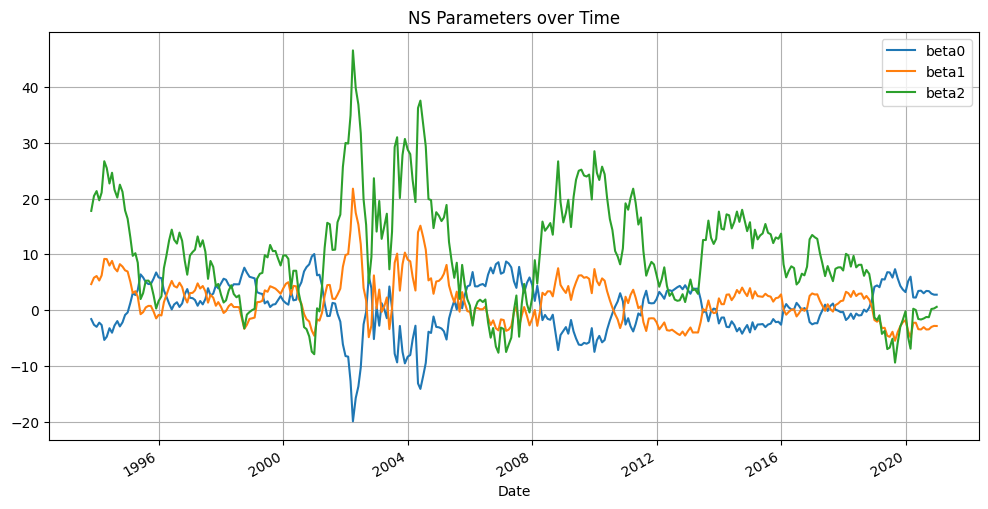

In [229]:
import matplotlib.pyplot as plt
betas_ts.plot(title="NS Parameters over Time", figsize=(12,6))
plt.grid(True)


In [230]:
forecast_steps = 12  # e.g., 12 months ahead

# Forecast future NS parameters
forecast = results.forecast(betas_ts.values[-results.k_ar:], steps=forecast_steps)
forecast_index = pd.date_range(start=betas_ts.index[-1] + pd.DateOffset(months=1),
                               periods=forecast_steps, freq='M')
forecast_betas = pd.DataFrame(forecast, index=forecast_index, columns=['beta0', 'beta1', 'beta2'])
forecast_betas
 
# Create a DataFrame for the forecasted parameters
# forecast_index = pd.date_range(start=betas_ts.index[0] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
# forecast_betas = pd.DataFrame(forecast, index=forecast_index, columns=['beta0', 'beta1', 'beta2'])



,beta0,beta1,beta2
2021-01-31,2.640964,-2.652692,0.994739
2021-02-28,2.609493,-2.641133,1.089872
2021-03-31,2.527463,-2.585171,1.290882
2021-04-30,2.429869,-2.514278,1.525977
2021-05-31,2.336100,-2.447487,1.752210
2021-06-30,2.246402,-2.384344,1.968971
2021-07-31,2.157614,-2.321586,2.183147
2021-08-31,2.070168,-2.259422,2.393742
2021-09-30,1.984722,-2.198426,2.599340
2021-10-31,1.901424,-2.138705,2.799658


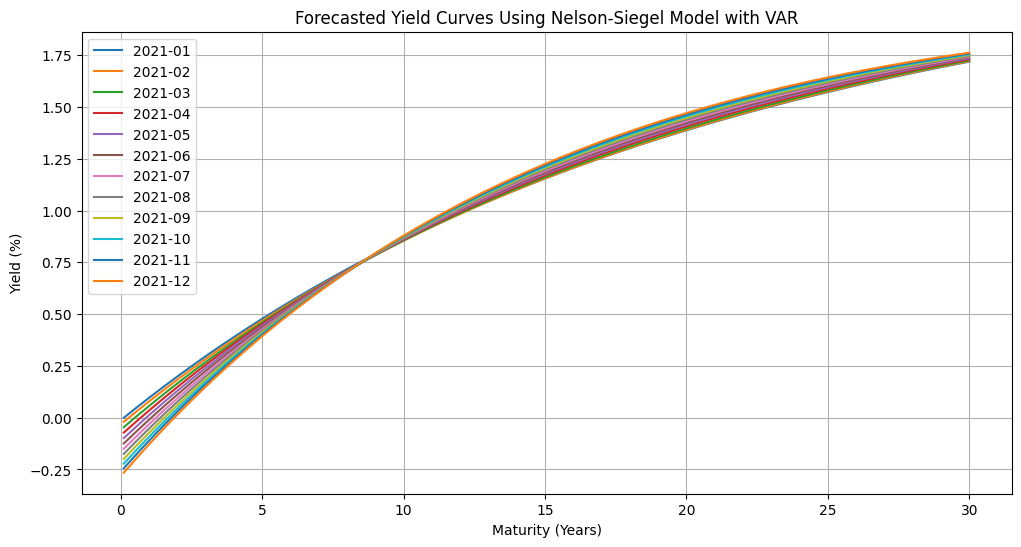

In [231]:
# Define a range of maturities for plotting
tau_plot = np.linspace(0.1, 30, 300)
yields_vector = []
# Plot the forecasted yield curves
plt.figure(figsize=(12, 6))
for date in forecast_betas.index:
    beta0, beta1, beta2 = forecast_betas.loc[date]
    yields = nelson_siegel(tau_plot, beta0, beta1, beta2, lambd)
    yields_vector.append(yields)
    plt.plot(tau_plot, yields, label=date.strftime('%Y-%m'))

plt.title('Forecasted Yield Curves Using Nelson-Siegel Model with VAR')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()


In [232]:
# Define maturities (same as tau_plot, or your specific points)
tau_values = np.array([1/12, 2/12, 3/12, 4/12, 0.5, 1, 2, 3, 5, 7, 10, 20, 30])  # years

# Create a list to store rows of yield vectors
yield_rows = []

# Iterate over each row in forecast_betas to compute yield curve
for date, row in forecast_betas.iterrows():
    beta0, beta1, beta2 = row
    yields = nelson_siegel(tau_values, beta0, beta1, beta2, lambd)
    yield_rows.append([date] + list(yields))

# Create DataFrame
columns = ['Date'] + [f'{int(t*12)} Mo' if t < 1 else f'{int(t)} Yr' for t in tau_values]
forecast_yields_df = pd.DataFrame(yield_rows, columns=columns)
forecast_yields_df.set_index('Date', inplace=True)

# Preview
forecast_yields_df


,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2021-01-31,-0.002492,0.006704,0.015860,0.024977,0.043094,0.096520,0.199336,0.297013,0.478039,0.641628,0.858221,1.388165,1.719451
2021-02-28,-0.022194,-0.012788,-0.003424,0.005900,0.024426,0.079044,0.184090,0.283806,0.468386,0.634907,0.854913,1.390234,1.721674
2021-03-31,-0.047894,-0.038125,-0.028399,-0.018718,0.000515,0.057185,0.166041,0.269197,0.459648,0.630852,0.856013,1.397308,1.725325
2021-04-30,-0.074180,-0.064000,-0.053866,-0.043780,-0.023748,0.035242,0.148399,0.255427,0.452464,0.628885,0.859719,1.407073,1.730440
2021-05-31,-0.100756,-0.090176,-0.079646,-0.069166,-0.048358,0.012886,0.130221,0.241016,0.444464,0.625974,0.862361,1.415789,1.734850
2021-06-30,-0.126923,-0.115958,-0.105046,-0.094188,-0.072631,-0.009215,0.112148,0.226575,0.436210,0.622637,0.864399,1.423793,1.738831
2021-07-31,-0.152570,-0.141225,-0.129937,-0.118705,-0.096411,-0.030855,0.094478,0.212484,0.428213,0.619480,0.866530,1.431755,1.742773
2021-08-31,-0.177477,-0.165760,-0.154103,-0.142505,-0.119488,-0.051834,0.077389,0.198902,0.420599,0.616604,0.868823,1.439704,1.746716
2021-09-30,-0.201561,-0.189482,-0.177465,-0.165511,-0.141790,-0.072092,0.060920,0.185847,0.413355,0.613971,0.871216,1.447568,1.750632


In [233]:
eom_data_test['Date'] = pd.to_datetime(eom_data_test['Date'])
eom_data_test.set_index('Date', inplace=True)
eom_data_test.sort_index(ascending=True)

/var/folders/y3/nzngm7d50bs8pgqzzcqgkwzh0000gn/T/ipykernel_18580/199628241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eom_data_test['Date'] = pd.to_datetime(eom_data_test['Date'])


,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2021-01-29,0.07,0.07,0.06,NaN,0.07,0.10,0.11,0.19,0.45,0.79,1.11,1.68,1.87
2021-02-26,0.04,0.04,0.04,NaN,0.05,0.08,0.14,0.30,0.75,1.15,1.44,2.08,2.17
2021-03-31,0.01,0.01,0.03,NaN,0.05,0.07,0.16,0.35,0.92,1.40,1.74,2.31,2.41
2021-04-30,0.01,0.02,0.01,NaN,0.03,0.05,0.16,0.35,0.86,1.32,1.65,2.19,2.30
2021-05-28,0.01,0.01,0.01,NaN,0.03,0.05,0.14,0.30,0.79,1.24,1.58,2.18,2.26
2021-06-30,0.05,0.05,0.05,NaN,0.06,0.07,0.25,0.46,0.87,1.21,1.45,2.00,2.06
2021-07-30,0.05,0.05,0.06,NaN,0.05,0.07,0.19,0.35,0.69,1.00,1.24,1.81,1.89
2021-08-31,0.03,0.05,0.04,NaN,0.06,0.07,0.20,0.40,0.77,1.08,1.30,1.85,1.92
2021-09-30,0.07,0.05,0.04,NaN,0.05,0.09,0.28,0.53,0.98,1.32,1.52,2.02,2.08


In [234]:

forecast_yields_df['YearMonth'] = forecast_yields_df.index.to_period('M')
]['YearMonth'] = eom_data_test.index.to_period('M')

/var/folders/y3/nzngm7d50bs8pgqzzcqgkwzh0000gn/T/ipykernel_18580/2395394474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eom_data_test['YearMonth'] = eom_data_test.index.to_period('M')


In [235]:
# If multiple rows per month exist, take last available
forecast_monthly = forecast_yields_df.groupby('YearMonth').last()
actual_monthly = eom_data_test.groupby('YearMonth').last()
common_months = forecast_monthly.index.intersection(actual_monthly.index)

forecast_aligned = forecast_monthly.loc[common_months]
actual_aligned = actual_monthly.loc[common_months]

# Define maturity columns (adjust if needed)
maturities = [col for col in forecast_aligned.columns if col in actual_aligned.columns and col not in ['Date', 'YearMonth']]
forecast_aligned = forecast_aligned[maturities]
actual_aligned = actual_aligned[maturities]


In [236]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

mae_per_maturity = {}
rmse_per_maturity = {}

for mat in maturities:
    y_true = actual_aligned[mat].values
    y_pred = forecast_aligned[mat].values
    
    # Filter to remove NaNs in either y_true or y_pred
    valid_mask = (~np.isnan(y_true)) & (~np.isnan(y_pred))
    y_true_clean = y_true[valid_mask]
    y_pred_clean = y_pred[valid_mask]
    
    if len(y_true_clean) == 0:
        # No valid data points for this maturity
        mae = np.nan
        rmse = np.nan
    else:
        mae = mean_absolute_error(y_true_clean, y_pred_clean)
        rmse = np.sqrt(mean_squared_error(y_true_clean, y_pred_clean))
    
    mae_per_maturity[mat] = mae
    rmse_per_maturity[mat] = rmse

error_metrics = pd.DataFrame({
    'MAE': mae_per_maturity,
    'RMSE': rmse_per_maturity
}).sort_index()

print("Backtest Error Metrics per Maturity:")
print(error_metrics)


Backtest Error Metrics per Maturity:
            MAE      RMSE
1 Mo   0.184714  0.211657
1 Yr   0.136945  0.205966
10 Yr  0.594885  0.618504
2 Mo   0.170252  0.194481
2 Yr   0.197951  0.294564
20 Yr  0.563287  0.592117
3 Mo   0.156678  0.180789
3 Yr   0.276578  0.375105
30 Yr  0.306998  0.365850
4 Mo        NaN       NaN
5 Yr   0.459511  0.514225
6 Mo   0.149616  0.185065
7 Yr   0.607192  0.637631


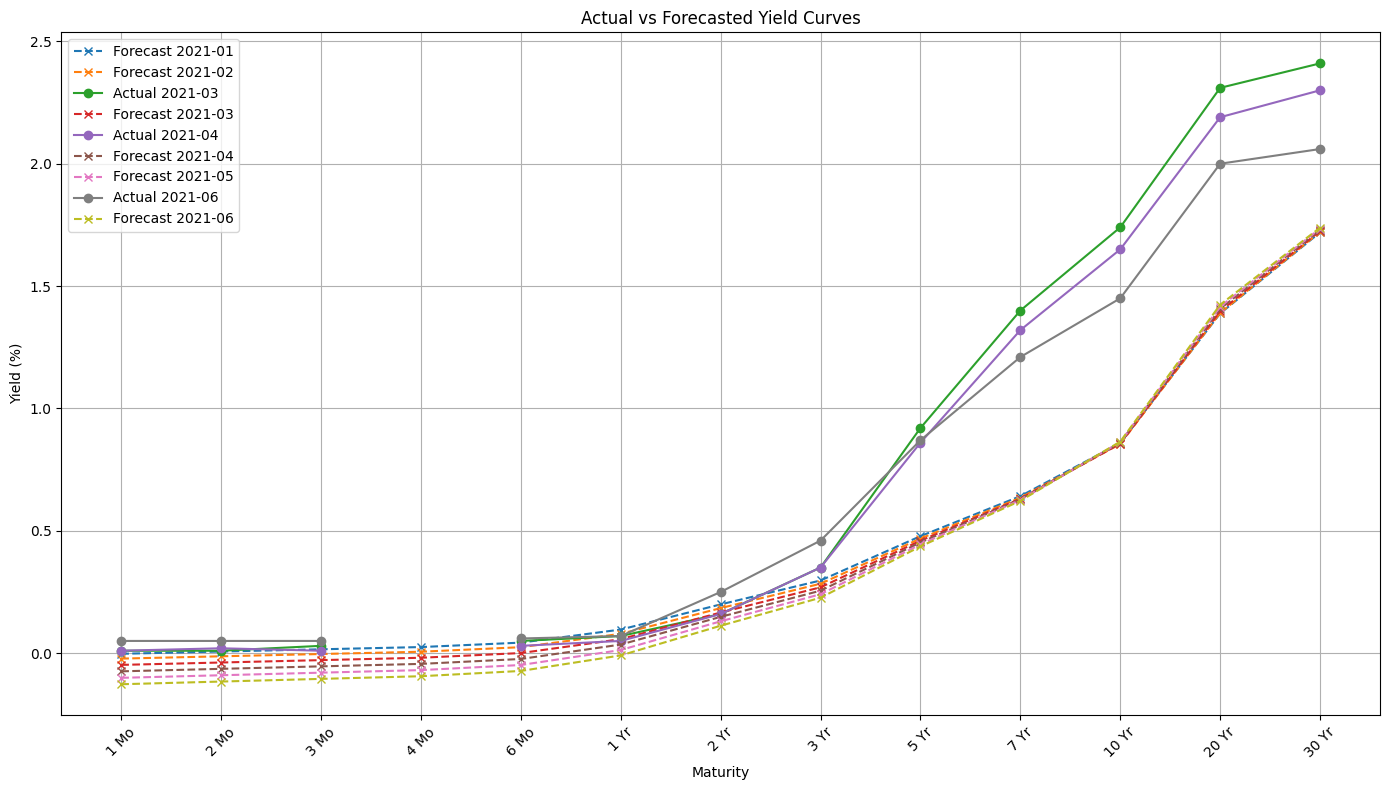

In [237]:
import matplotlib.pyplot as plt

# Select maturities to plot (same as in your data)
maturities = ['1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']

# Pick a few dates to plot for clarity, or you can loop over all
dates_to_plot = forecast_yields_df.index[:6]  # first 6 forecasted dates for example

plt.figure(figsize=(14, 8))

for date in dates_to_plot:
    if date in eom_data_test.index:
        # Plot actual yields
        plt.plot(maturities, eom_data_test.loc[date, maturities], marker='o', linestyle='-', label=f'Actual {date.strftime("%Y-%m")}')
    
    # Plot forecast yields
    plt.plot(maturities, forecast_yields_df.loc[date, maturities], marker='x', linestyle='--', label=f'Forecast {date.strftime("%Y-%m")}')

plt.title('Actual vs Forecasted Yield Curves')
plt.xlabel('Maturity')
plt.ylabel('Yield (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
